In [1]:
import http.client
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'b55a7652a9e9403dbbd0d0da87c17c14', 'X-Response-Control': 'minified' }
connection.request('GET', '/v1/competitions/467/teams', None, headers )
response = json.loads(connection.getresponse().read().decode())

In [2]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "count": 32,
    "teams": [
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/f3/Flag_of_Russia.svg",
            "id": 808,
            "name": "Russia",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/0/0d/Flag_of_Saudi_Arabia.svg",
            "id": 801,
            "name": "Saudi Arabia",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/fe/Flag_of_Egypt.svg",
            "id": 825,
            "name": "Egypt",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/fe/Flag_of_Uruguay.svg",
            "id": 758,
            "name": "Uruguay",
            "shortName": null,
            "squadMarketValue": null
     

In [3]:
name = []
# team_id = []
for x in range(0,32):
    
    name.append(response["teams"][x]["name"])
#     team_id.append(response["teams"][x]["id"])
    
team_dict = {"Country": name,}
team_data_df = pd.DataFrame(team_dict)
team_data_df.head(32)

,Country
0,Russia
1,Saudi Arabia
2,Egypt
3,Uruguay
4,Morocco
5,Iran
6,Portugal
7,Spain
8,France
9,Australia


In [4]:
types_df = pd.read_csv("./results.csv")
types_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
home_team_df = (types_df.groupby("home_team").sum()).reset_index()
home_team_df = home_team_df.rename(columns={"home_team": "Country"})
home_team_df

,Country,home_score,away_score,neutral
0,Afghanistan,49,57,30.0
1,Albania,185,190,20.0
2,Algeria,499,243,100.0
3,American Samoa,15,124,20.0
4,Andorra,24,165,18.0
5,Angola,229,138,45.0
6,Anguilla,11,38,6.0
7,Antigua and Barbuda,162,137,31.0
8,Argentina,1179,463,203.0
9,Armenia,104,144,17.0


In [6]:
merge_country_df = pd.merge(team_data_df, home_team_df, on='Country')
merge_country_df.drop('neutral', axis=1, inplace=True)
merge_country_df = merge_country_df.sort_values(by=['home_score', 'away_score'], ascending=False)
merge_country_df = merge_country_df.rename(columns={"home_score": "Home Score", "away_score": "Away Score"})
merge_country_df['Score Variance'] = merge_country_df['Home Score'] - merge_country_df['Away Score']
merge_country_df.reset_index(drop = True)

,Country,Home Score,Away Score,Score Variance
0,Brazil,1365,461,904
1,Germany,1213,506,707
2,Argentina,1179,463,716
3,Sweden,1117,547,570
4,England,1104,430,674
5,Mexico,978,420,558
6,France,924,509,415
7,Korea Republic,898,331,567
8,Denmark,841,485,356
9,Spain,812,261,551


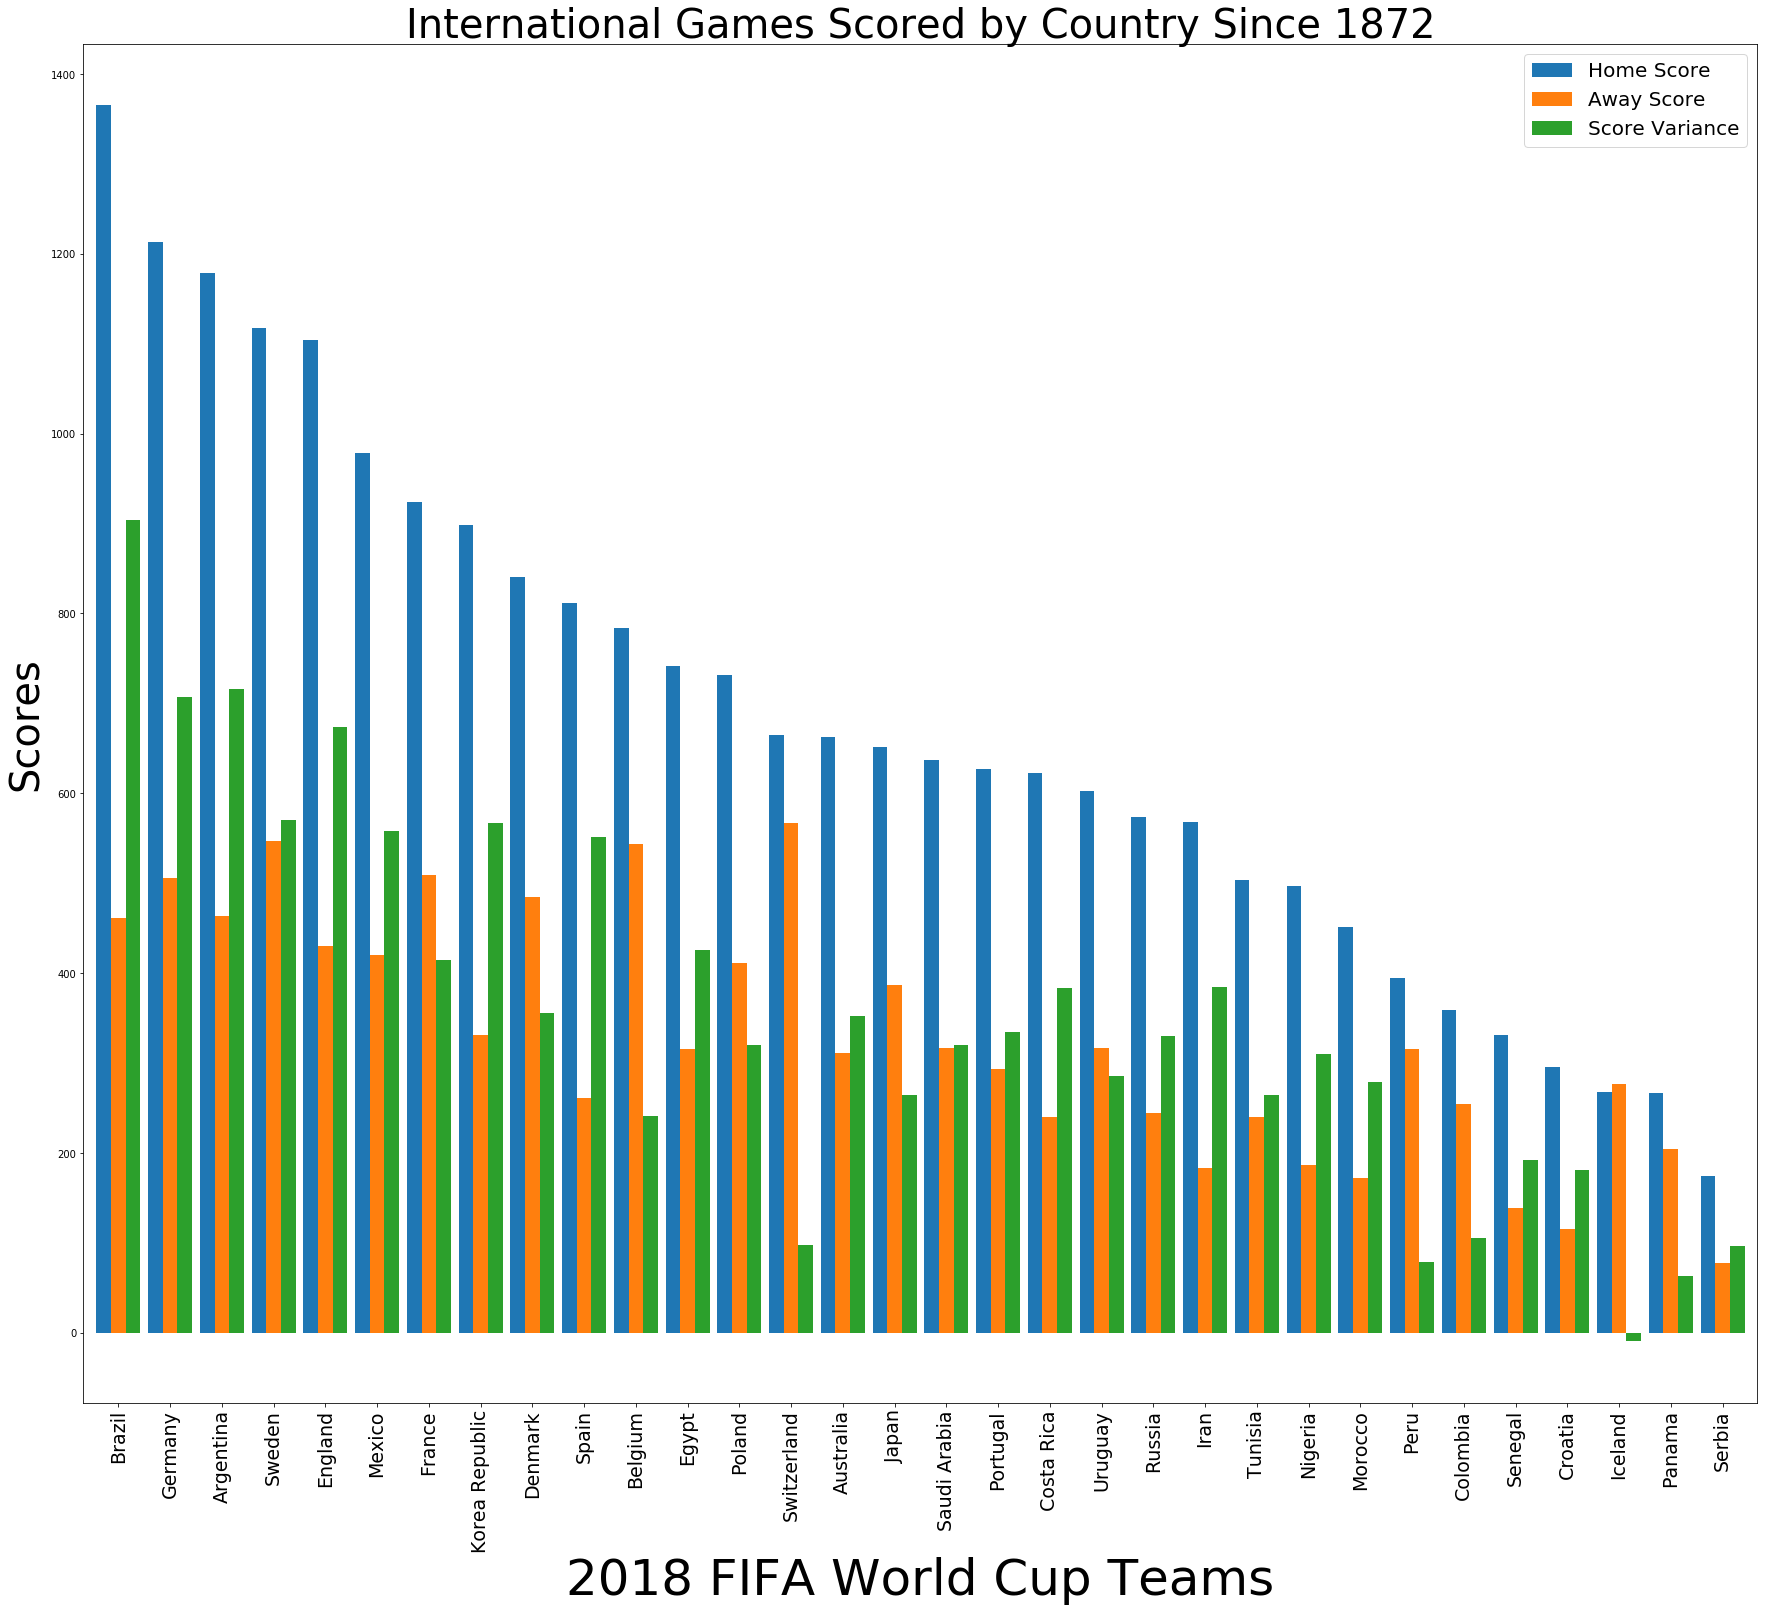

In [7]:
x_axis = np.arange(len(merge_country_df))
tick_locations = [value for value in x_axis]
plot = merge_country_df.plot(kind="bar", width=0.85, figsize=(30,25))
plot.set_xticklabels(merge_country_df["Country"], rotation=90, fontsize = 19)
plt.title("International Games Scored by Country Since 1872",  fontsize = 40)
plt.xlabel("2018 FIFA World Cup Teams",  fontsize = 50)
plt.ylabel("Scores",  fontsize = 40)
plot.legend(loc=1, prop={'size': 20})
plt.savefig("Historical Games")
plt.show()

In [10]:
soccer_data_df = pd.read_csv("./worldcup2014.csv")
soccer_data_df = soccer_data_df.rename(columns={"Team": "Country"})
soccer_data_df

,Country,Group,Advanced,Rankings,Standing,WikiStanding,Ranking Differential,Points in Group Round,Games Played,Goals,...,Miles per Game,Value of players (in million euros),Possession Percentage,Pass Percentage,Tackles per Game,Interceptions per Game,Cross per Game,Through Ball per Game,Long Balls per Game,Short Passes per Game
0,Algeria,H,Y,21,9,14,7,4,4,7,...,71.76,57.20,41.7,73.2,23.3,17.3,17,1,64,296
1,Argentina,F,Y,5,2,2,3,9,7,8,...,72.90,391.50,53.4,84.2,21.6,15.9,24,3,60,453
2,Australia,B,N,32,17,30,2,3,3,3,...,73.38,21.35,44.3,79.7,12.3,15.3,17,1,50,361
3,Belgium,H,Y,11,5,6,5,9,5,6,...,71.70,348.00,51.3,82.1,20.2,13.0,25,2,62,376
4,Bosnia and Herzegovina,F,N,20,17,20,0,3,3,4,...,69.96,114.95,53.6,85.6,13.3,13.7,25,2,48,443
5,Brazil,A,Y,3,4,4,-1,7,7,11,...,66.36,467.50,52.7,82.3,21.4,14.9,22,3,61,360
6,Cameroon,A,N,30,17,32,-2,0,3,1,...,60.45,118.45,44.0,79.3,14.7,16.0,18,1,48,263
7,Chile,B,Y,14,9,9,5,3,4,6,...,74.75,139.30,53.1,79.9,17.8,13.8,16,1,88,417
8,Colombia,C,Y,8,5,5,3,9,5,12,...,64.20,190.20,47.4,77.9,18.8,10.4,14,1,48,290
9,Costa Rica,D,Y,24,5,8,16,7,5,5,...,74.14,29.63,41.8,75.3,20.6,13.4,12,1,65,301


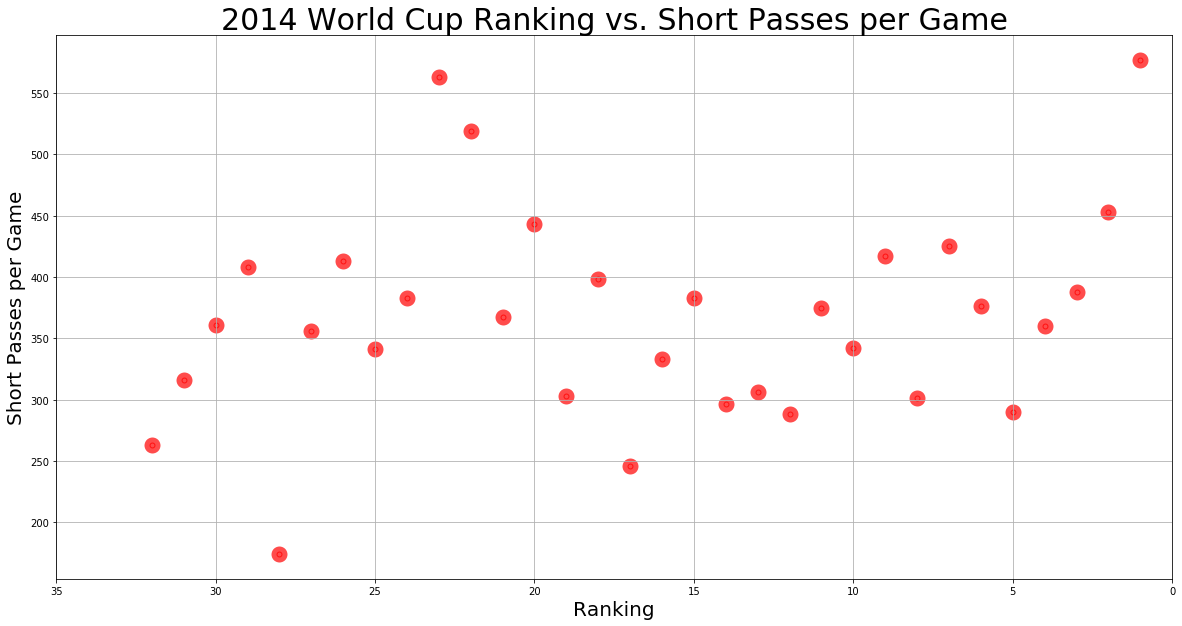

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(soccer_data_df["WikiStanding"], soccer_data_df["Short Passes per Game"], c="red", alpha=0.7, linewidth=10, marker="o", edgecolors="red")
plt.grid(True)
plt.xlim(35, 0)
plt.xlabel("Ranking", fontsize=20)
plt.ylabel("Short Passes per Game", fontsize=20)
plt.title("2014 World Cup Ranking vs. Short Passes per Game", fontsize=30)
plt.savefig("Rankingvsshortpasses")
plt.show()

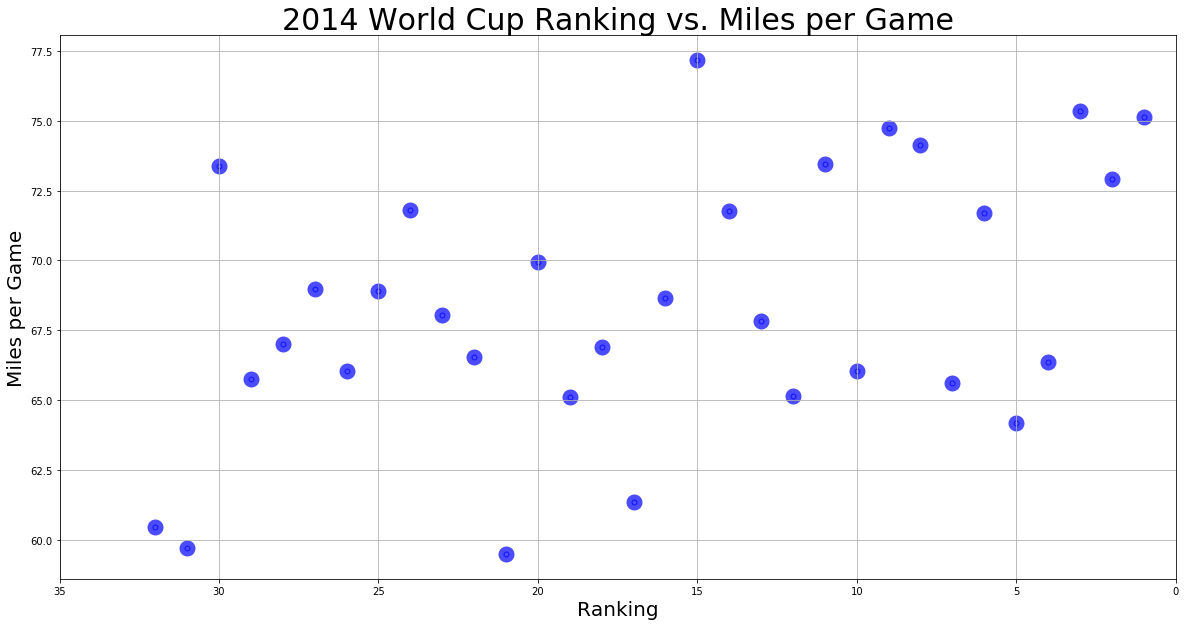

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(soccer_data_df["WikiStanding"], soccer_data_df["Miles per Game"], c="blue", alpha=0.7, linewidth=10, marker="o", edgecolors="blue")
plt.grid(True)
plt.xlim(35, 0)
plt.xlabel("Ranking", fontsize=20)
plt.ylabel("Miles per Game", fontsize=20)
plt.title("2014 World Cup Ranking vs. Miles per Game", fontsize=30)
plt.savefig("RankingvsMiles")
plt.show()

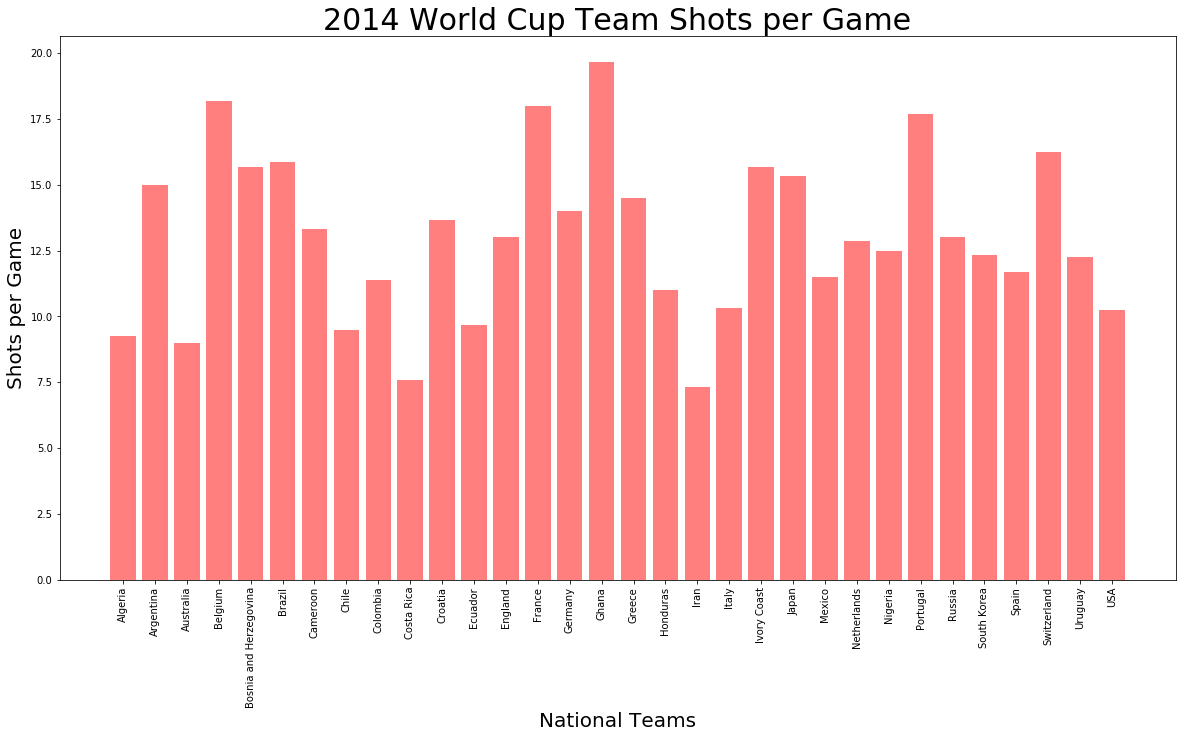

In [13]:
plt.figure(figsize=(20,10))

shots_per_game = soccer_data_df["Shots per Game"]
x_axis = np.arange(len(shots_per_game))
x_axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, soccer_data_df["Country"], rotation=90)

# Give our chart some labels and a tile
plt.title("2014 World Cup Team Shots per Game", fontsize=30)
plt.xlabel("National Teams", fontsize=20)
plt.ylabel("Shots per Game", fontsize=20)

plt.bar(x_axis, shots_per_game, color='r', alpha=0.5, align="center")

plt.savefig("worldcup2014shotspergame")

# Print our chart to the screen
plt.show()

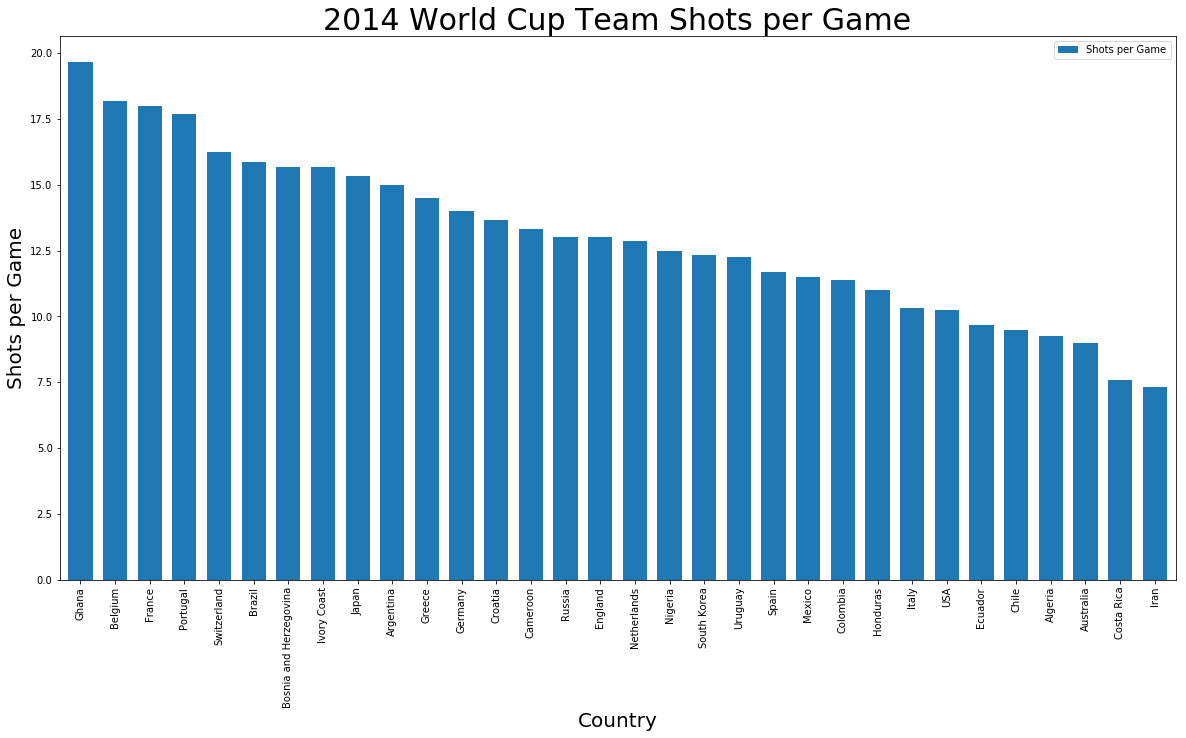

In [14]:
#team_shots = soccer_data_df.loc[(soccer_data_df["Advanced"] == "Y")]
team_shots = soccer_data_df[["Country","Shots per Game", "Advanced"]]

team_shots = team_shots.set_index("Country").sort_values("Shots per Game", ascending=False)

       
team_shots.plot(kind="bar", figsize=(20,10), rot=90, width=.7)

plt.xlabel("Country", fontsize=20)
plt.ylabel("Shots per Game", fontsize=20)
plt.title("2014 World Cup Team Shots per Game", fontsize=30)

plt.savefig("sortworldcup2014shotspergame")

plt.show()

In [15]:
appearances = pd.read_csv("./league.csv")
appearances.head()

,Unnamed: 0,AFC,CAF,CONCACAF,CONMEBOL,OFC,UEFA,Total
0,Teams,37,44,42,85,4,245,457
1,Top 16,5,9,13,31,1,81,140
2,Top 8,2,3,5,32,0,94,136
3,Top 4,1,0,1,22,0,56,80
4,Top 2,0,0,0,14,0,26,40


In [16]:
sizes = appearances.iloc[0,1:7]
sizes

AFC          37
CAF          44
CONCACAF     42
CONMEBOL     85
OFC           4
UEFA        245
Name: 0, dtype: object

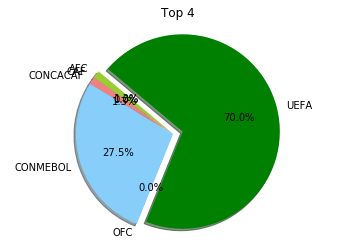

In [17]:
# Labels for the sections of our pie chart
labels = ["AFC","CAF","CONCACAF","CONMEBOL","OFC","UEFA"]

# The values of each section of the pie chart
sizes = [1, 0, 1, 22, 0, 56]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# enables auto percent you to display percent values using python formatting 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("Top 4")

# Prints our pie chart to the screen
plt.show()

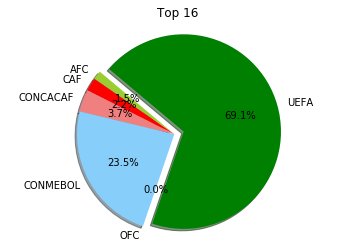

In [18]:
# Labels for the sections of our pie chart
labels = ["AFC","CAF","CONCACAF","CONMEBOL","OFC","UEFA"]

# The values of each section of the pie chart
sizes = [2, 3, 5, 32, 0, 94]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# enables auto percent you to display percent values using python formatting 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("Top 16")

# Prints our pie chart to the screen
plt.show()

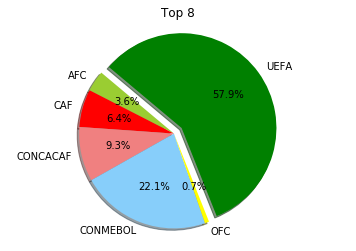

In [19]:
# Labels for the sections of our pie chart
labels = ["AFC","CAF","CONCACAF","CONMEBOL","OFC","UEFA"]

# The values of each section of the pie chart
sizes = [5, 9, 13, 31, 1, 81]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# enables auto percent you to display percent values using python formatting 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("Top 8")

# Prints our pie chart to the screen
plt.show()

In [20]:
group_a = soccer_data_df.loc[(soccer_data_df["Group"] == "A")]
group_a

,Country,Group,Advanced,Rankings,Standing,WikiStanding,Ranking Differential,Points in Group Round,Games Played,Goals,...,Miles per Game,Value of players (in million euros),Possession Percentage,Pass Percentage,Tackles per Game,Interceptions per Game,Cross per Game,Through Ball per Game,Long Balls per Game,Short Passes per Game
5,Brazil,A,Y,3,4,4,-1,7,7,11,...,66.36,467.50,52.7,82.3,21.4,14.9,22,3,61,360
6,Cameroon,A,N,30,17,32,-2,0,3,1,...,60.45,118.45,44.0,79.3,14.7,16.0,18,1,48,263
10,Croatia,A,N,17,17,19,-2,3,3,6,...,65.12,193.25,49.8,80.6,16.0,12.0,25,2,71,303
22,Mexico,A,Y,19,9,10,9,7,4,5,...,66.06,96.55,49.3,79.9,14.8,10.5,18,1,53,342


In [21]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\rjabbari\AppData\Local\pip\Cache\wheels\0c\3e\07\4848195c61f659184ca41d5a614845a018ab2d2f2a705b9998
Successfully built plotly


In [22]:
import plotly

In [23]:
plotly.tools.set_credentials_file(username='long2691', api_key='1lkeEJFTzwcAtA1YJGWl')

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/long2691/Homework/master/wc_all_time.csv')
df

,Rank,TEAM,Country Code,GDP,PTS,Matches Played,Wins,Draw,Loss,Goals Scored,Goals Against,Average Points,Appearances,World Cup Championships,Compound,Negative,Neutral,Positive
0,1,BRAZIL,BRA,1.796190e+12,227,104,70,17,17,221,102,2.2,20,5.0,0.231,0.803,0.062,0.135
1,2,GERMANY,DEU,3.477800e+12,218,106,66,20,20,224,121,2.1,18,4.0,0.392,0.808,0.012,0.180
2,3,ITALY,ITA,1.859380e+12,156,83,45,21,17,128,77,1.9,18,4.0,NaN,NaN,NaN,NaN
3,4,ARGENTINA,ARG,5.454760e+11,140,77,42,14,21,131,84,1.8,16,2.0,0.184,0.868,0.037,0.094
4,5,SPAIN,ESP,1.237260e+12,99,59,29,12,18,92,66,1.7,14,1.0,0.118,0.954,0.003,0.043
5,6,ENGLAND,GBR,2.650850e+12,98,62,26,20,16,79,56,1.6,14,1.0,0.300,0.836,0.021,0.143
6,7,FRANCE,FRA,2.465450e+12,96,59,28,12,19,106,71,1.6,14,1.0,0.094,0.866,0.042,0.092
7,8,NETHERLANDS,NLD,7.772280e+11,93,50,27,12,11,86,48,1.9,10,NaN,NaN,NaN,NaN,NaN
8,9,URUGUAY,URY,5.241972e+10,72,51,20,12,19,80,71,1.4,12,2.0,0.163,0.934,0.004,0.062
9,10,SWEDEN,SWE,5.144600e+11,61,46,16,13,17,74,69,1.3,11,NaN,0.197,0.885,0.026,0.089


In [25]:
import plotly.plotly as py

data = [ dict(
        type = 'choropleth',
        locations = df['Country Code'],
        z = df['Wins'],
        text = df['TEAM'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Wins'),
      ) ]

layout = dict(
    title = 'World Cup All-Time Wins',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='World Cup All-Time Wins' )

In [26]:
data = [ dict(
        type = 'choropleth',
        locations = df['Country Code'],
        z = df['Compound'],
        text = df['TEAM'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),

      ) ]

layout = dict(
    title = 'World Cup Twitter Sentiment',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='tweepy-world-map' )

In [28]:
sortwins = df.sort_values("Wins")

In [29]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x= sortwins["Wins"],
            y= sortwins['TEAM'],
            orientation = 'h',
           
)]
layout = dict(title = 'Country All Time Wins',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Country All Time Wins')
#py.iplot(data, filename='horizontal-bar', title='title')


In [30]:
# Create a trace
trace = go.Scatter(
    x = df['Wins'],
    y = df['GDP'],
    mode = 'markers'
)

data = [trace]
layout = dict(title = 'Wins vs Country GDP',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Wins vs Country GDP')
# Plot and embed in ipython notebook!
##py.iplot(data, filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [31]:
# Create a trace
trace = go.Scatter(
    x = df['World Cup Championships'],
    y = df['GDP'],
    mode = 'markers'
)

data = [trace]
layout = dict(title = 'Championships vs Country GDP',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Championships vs Country GDP')
# Plot and embed in ipython notebook!
##py.iplot(data, filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')